In [29]:
# import necessary modules 
import pandas as pd    
import matplotlib.pyplot as plt
import numpy as np
import webcolors
from IPython.display import display

<p>Let us start by reading in the <code>colors</code> data to get a sense of the diversity of Lego sets!</p>

In [3]:
# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
display(colors.head())

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


### Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [7]:
# How many distinct colors are available?
num_colors = colors.shape[0]

# Print num_colors
print(num_colors)

135


### Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. <br>It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


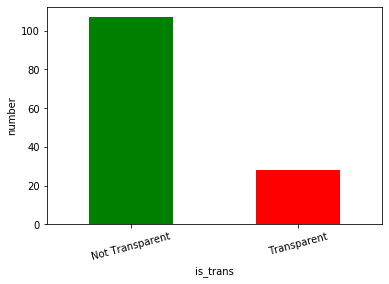

In [19]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby('is_trans').count()

display(colors_summary)

trans_colors['name'].plot(kind='bar', color=["green", "red"])
plt.xticks(np.arange(2), ('Not Transparent', 'Transparent'), rotation=15)
plt.ylabel("number")
plt.show()

### Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. <br>It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


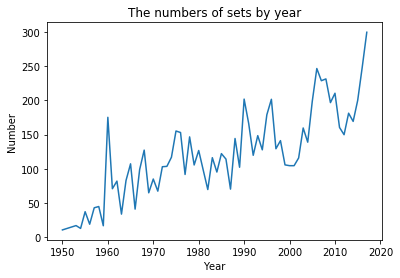

In [43]:
# Read sets data as `sets`
sets = pd.read_csv('datasets/sets.csv')

display(sets.head())
# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets.groupby('year').mean()['num_parts']

# Plot trends in average number of parts by year
plt.plot(parts_by_year)
plt.title("The numbers of sets by year")
plt.xlabel("Year")
plt.ylabel("Number")
plt.show()

### Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. <br>Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

,theme_id
year,
1950,7
1953,4
1954,14
1955,28
1956,12


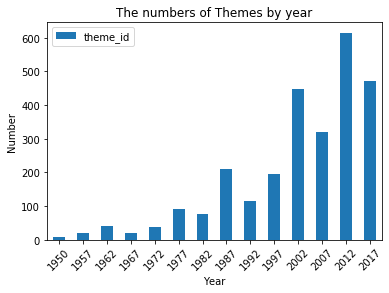

In [67]:
themes_by_year = sets.groupby('year').count()[['theme_id']]

display(themes_by_year.head())

idx = themes_by_year.index[::5]

themes_by_year.loc[idx].plot(kind='bar')
plt.title("The numbers of Themes by year")
plt.xlabel("Year")
plt.ylabel("Number")
plt.xticks(rotation=45)
plt.show()
